In [1]:
import sys
sys.path.append("/storage/vbutoi/projects/")
sys.path.append("/storage/vbutoi/libraries/")
from ionpy.analysis import ResultsLoader
import pathlib
import seaborn as sns
import pandas as pd
sns.set_context('talk')
sns.set_style("darkgrid")

import os 
os.environ['DATAPATH'] = ':'.join((
       '/storage',
))

# Results loader object does everything
rs = ResultsLoader()
root = "/storage/vbutoi/scratch/ESE"

In [2]:
path_list = [
    # "/storage/vbutoi/scratch/ESE/restarted/09_05_24_ISLES_MEGA_lowLR_RESTARTED",
    # "/storage/vbutoi/scratch/ESE/restarted/09_05_24_ISLES_META_lowLR_wSVLS_RESTARTED",
    "/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA",
    "/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA_wSVLS",
]

df_list = []
for path in path_list:
    try:
        dfc = rs.load_configs(
            path,
            properties=False,
        )
        df = rs.load_metrics(dfc)
        df_list.append(df)
    except Exception as e:
        print(e)
df = pd.concat(df_list)

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [3]:
for ikey in df.keys():
    print(ikey)

phase
epoch
loss
dice_score
ece_loss
edge_ece_loss
data
in_channels
out_channels
preload
train_splits
val_splits
version
batch_size
num_workers
pin_memory
seed
loss_func
batch_reduction
from_logits
model
convs_per_block
filters
optim
lr
epochs
eval_freq
path
train


In [4]:
def calibrator(path):
    if 'SVLS' in str(path):
        return 'SVLS'
    else:
        return 'None'
    
df.augment(calibrator)

In [5]:
df['path'].unique()

array([PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_133954-QJZP-909536d22eb3b11a076de0a587540ffc'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_134011-S20I-9c38a9d9b3e32675a876b07377760c1b'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_134007-9GMC-55a100a3bdac8c13f888741fa610ec73'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_133950-RSEZ-259e596b5010336037b622ffb2313f39'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_133942-VJMO-24e86057158f7592cde1be6c518d4a32'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_134003-XYGH-1a56c94541ec1b086ec4eddc73eaab94'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_133958-5CLX-093ffbff54656e724f5d42c85dea783a'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/2

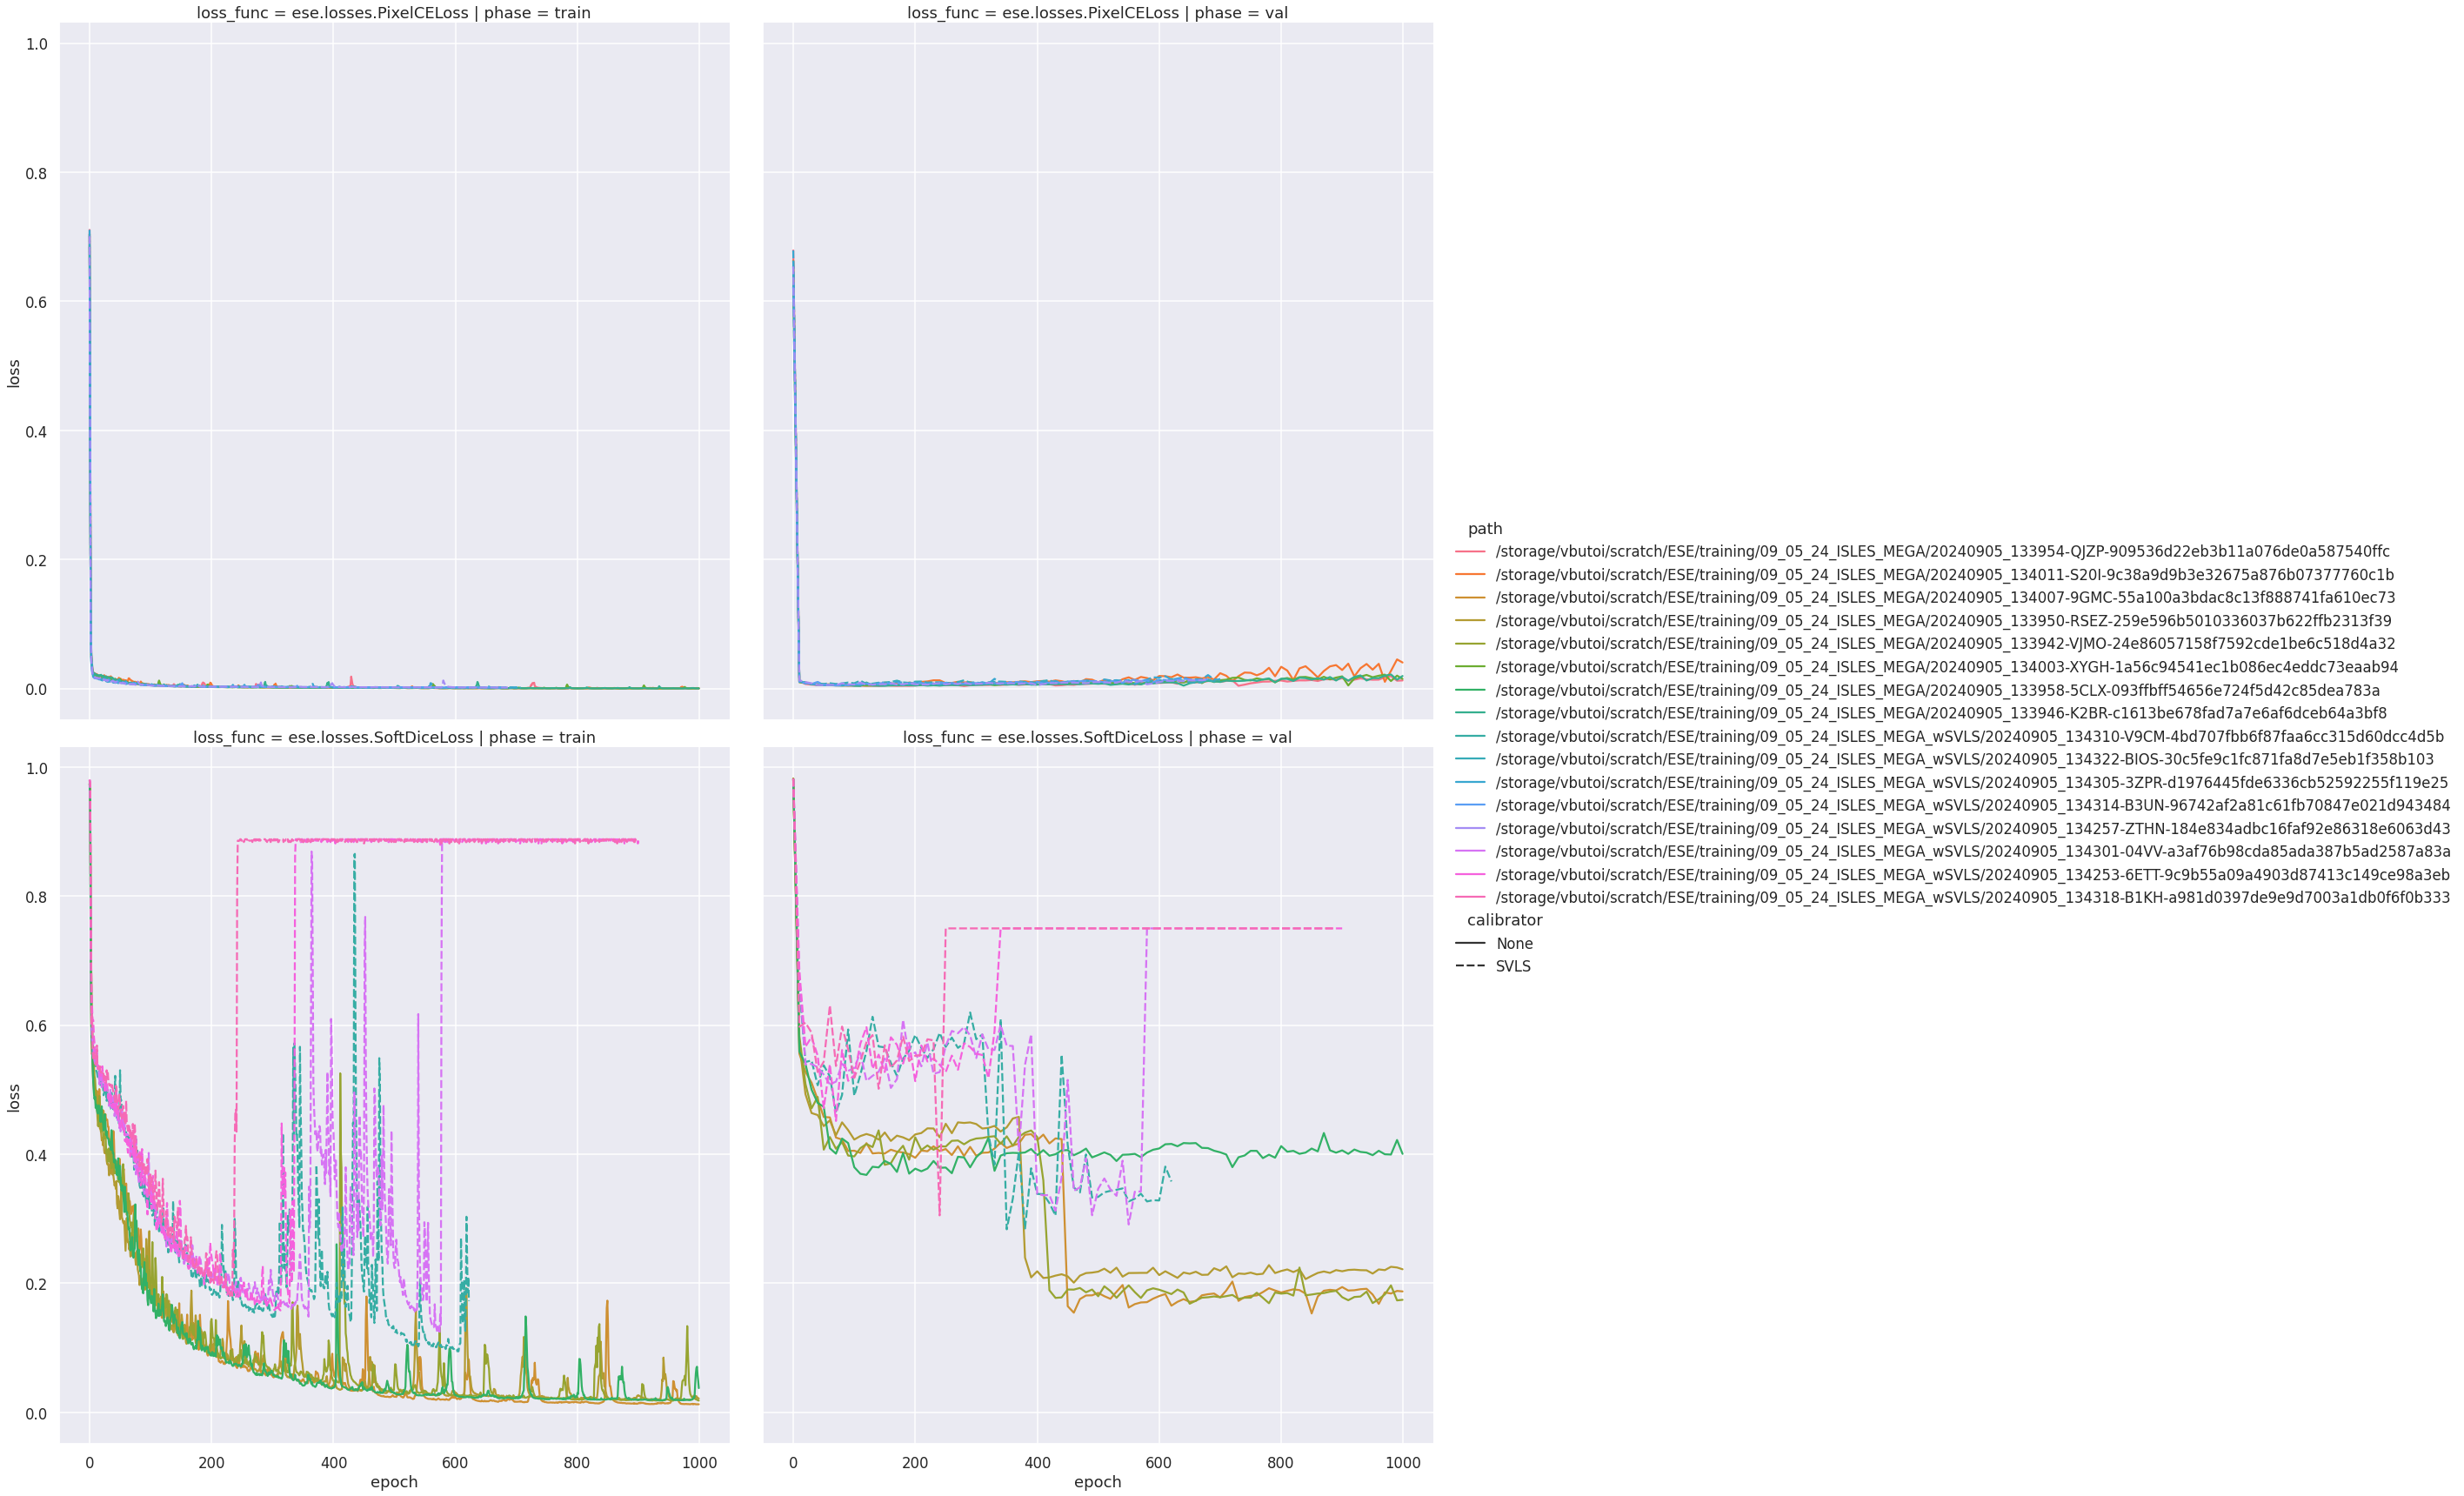

In [6]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='loss',
    hue='path',
    style='calibrator',   
    col='phase',
    row='loss_func',
    kind='line',
    height=12,
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

In [7]:
df.select(loss_func='ese.losses.PixelCELoss')['path'].unique()

array([PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_133954-QJZP-909536d22eb3b11a076de0a587540ffc'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_134011-S20I-9c38a9d9b3e32675a876b07377760c1b'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_134003-XYGH-1a56c94541ec1b086ec4eddc73eaab94'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA/20240905_133946-K2BR-c1613be678fad7a7e6af6dceb64a3bf8'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA_wSVLS/20240905_134322-BIOS-30c5fe9c1fc871fa8d7e5eb1f358b103'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA_wSVLS/20240905_134305-3ZPR-d1976445fde6336cb52592255f119e25'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_05_24_ISLES_MEGA_wSVLS/20240905_134314-B3UN-96742af2a81c61fb70847e021d943484'),
       PosixPath('/storage/vbutoi/scratch/ESE/training/09_

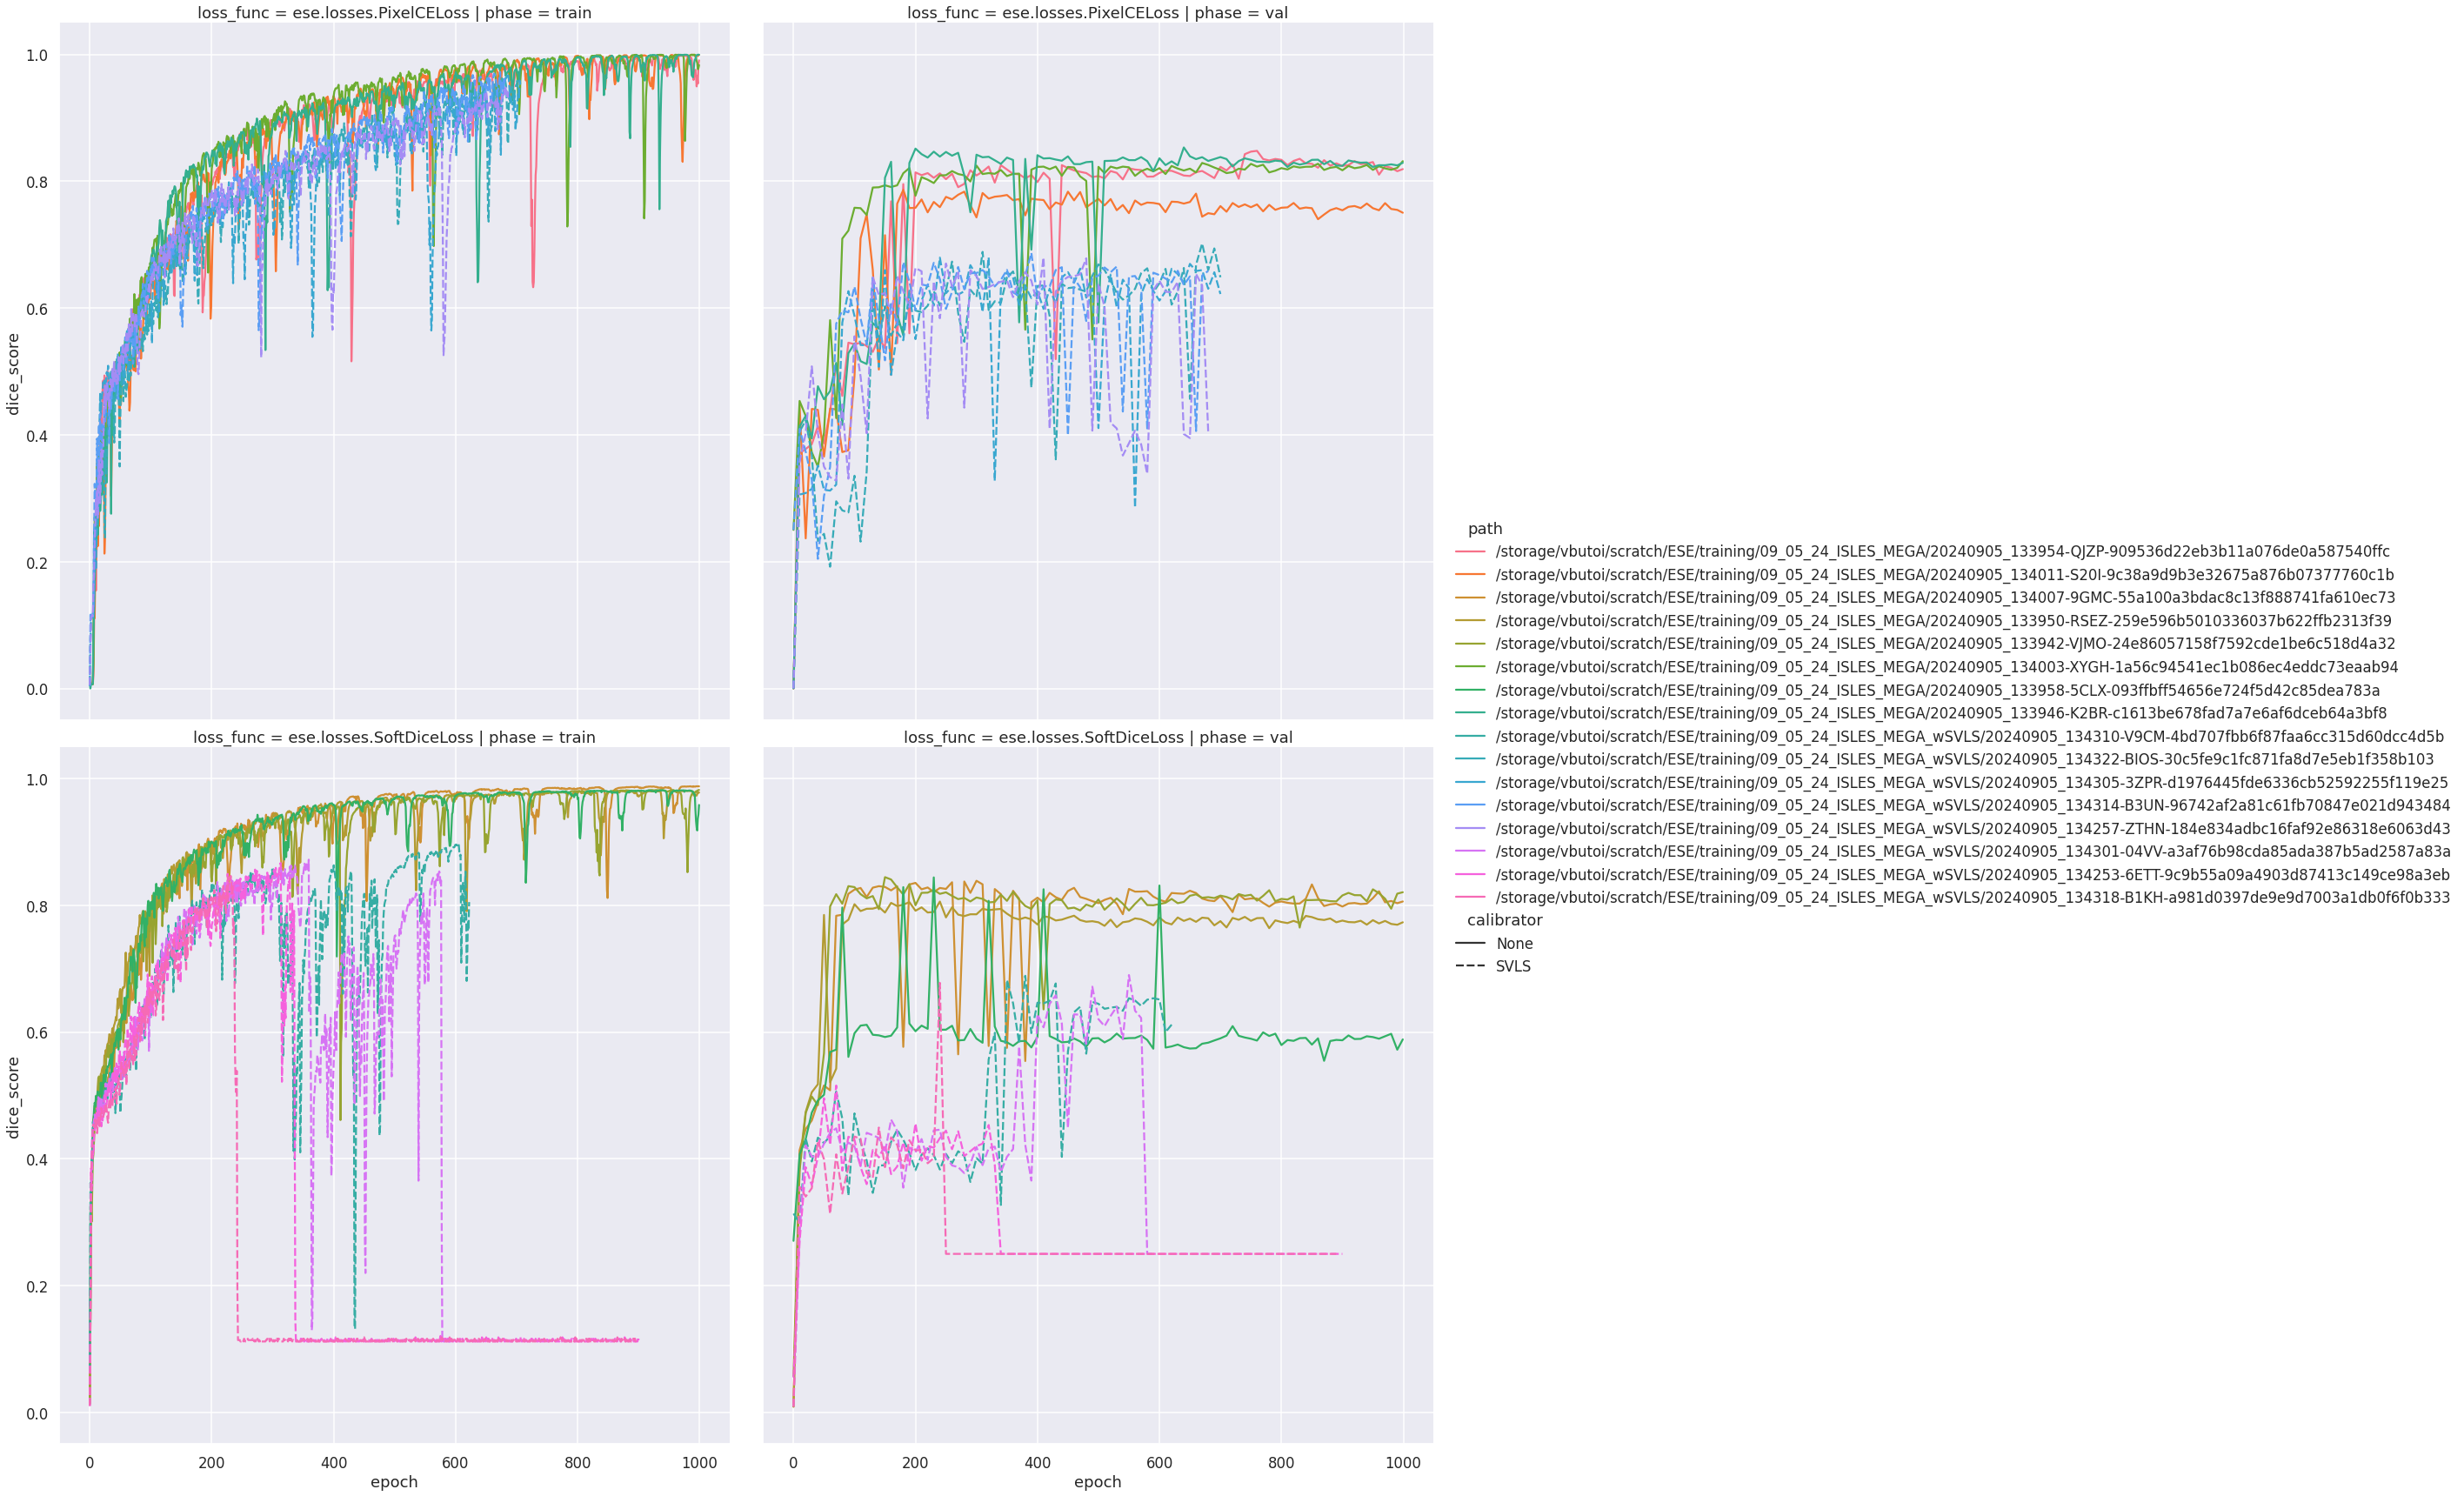

In [8]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='dice_score',
    hue='path',
    style='calibrator',
    row='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

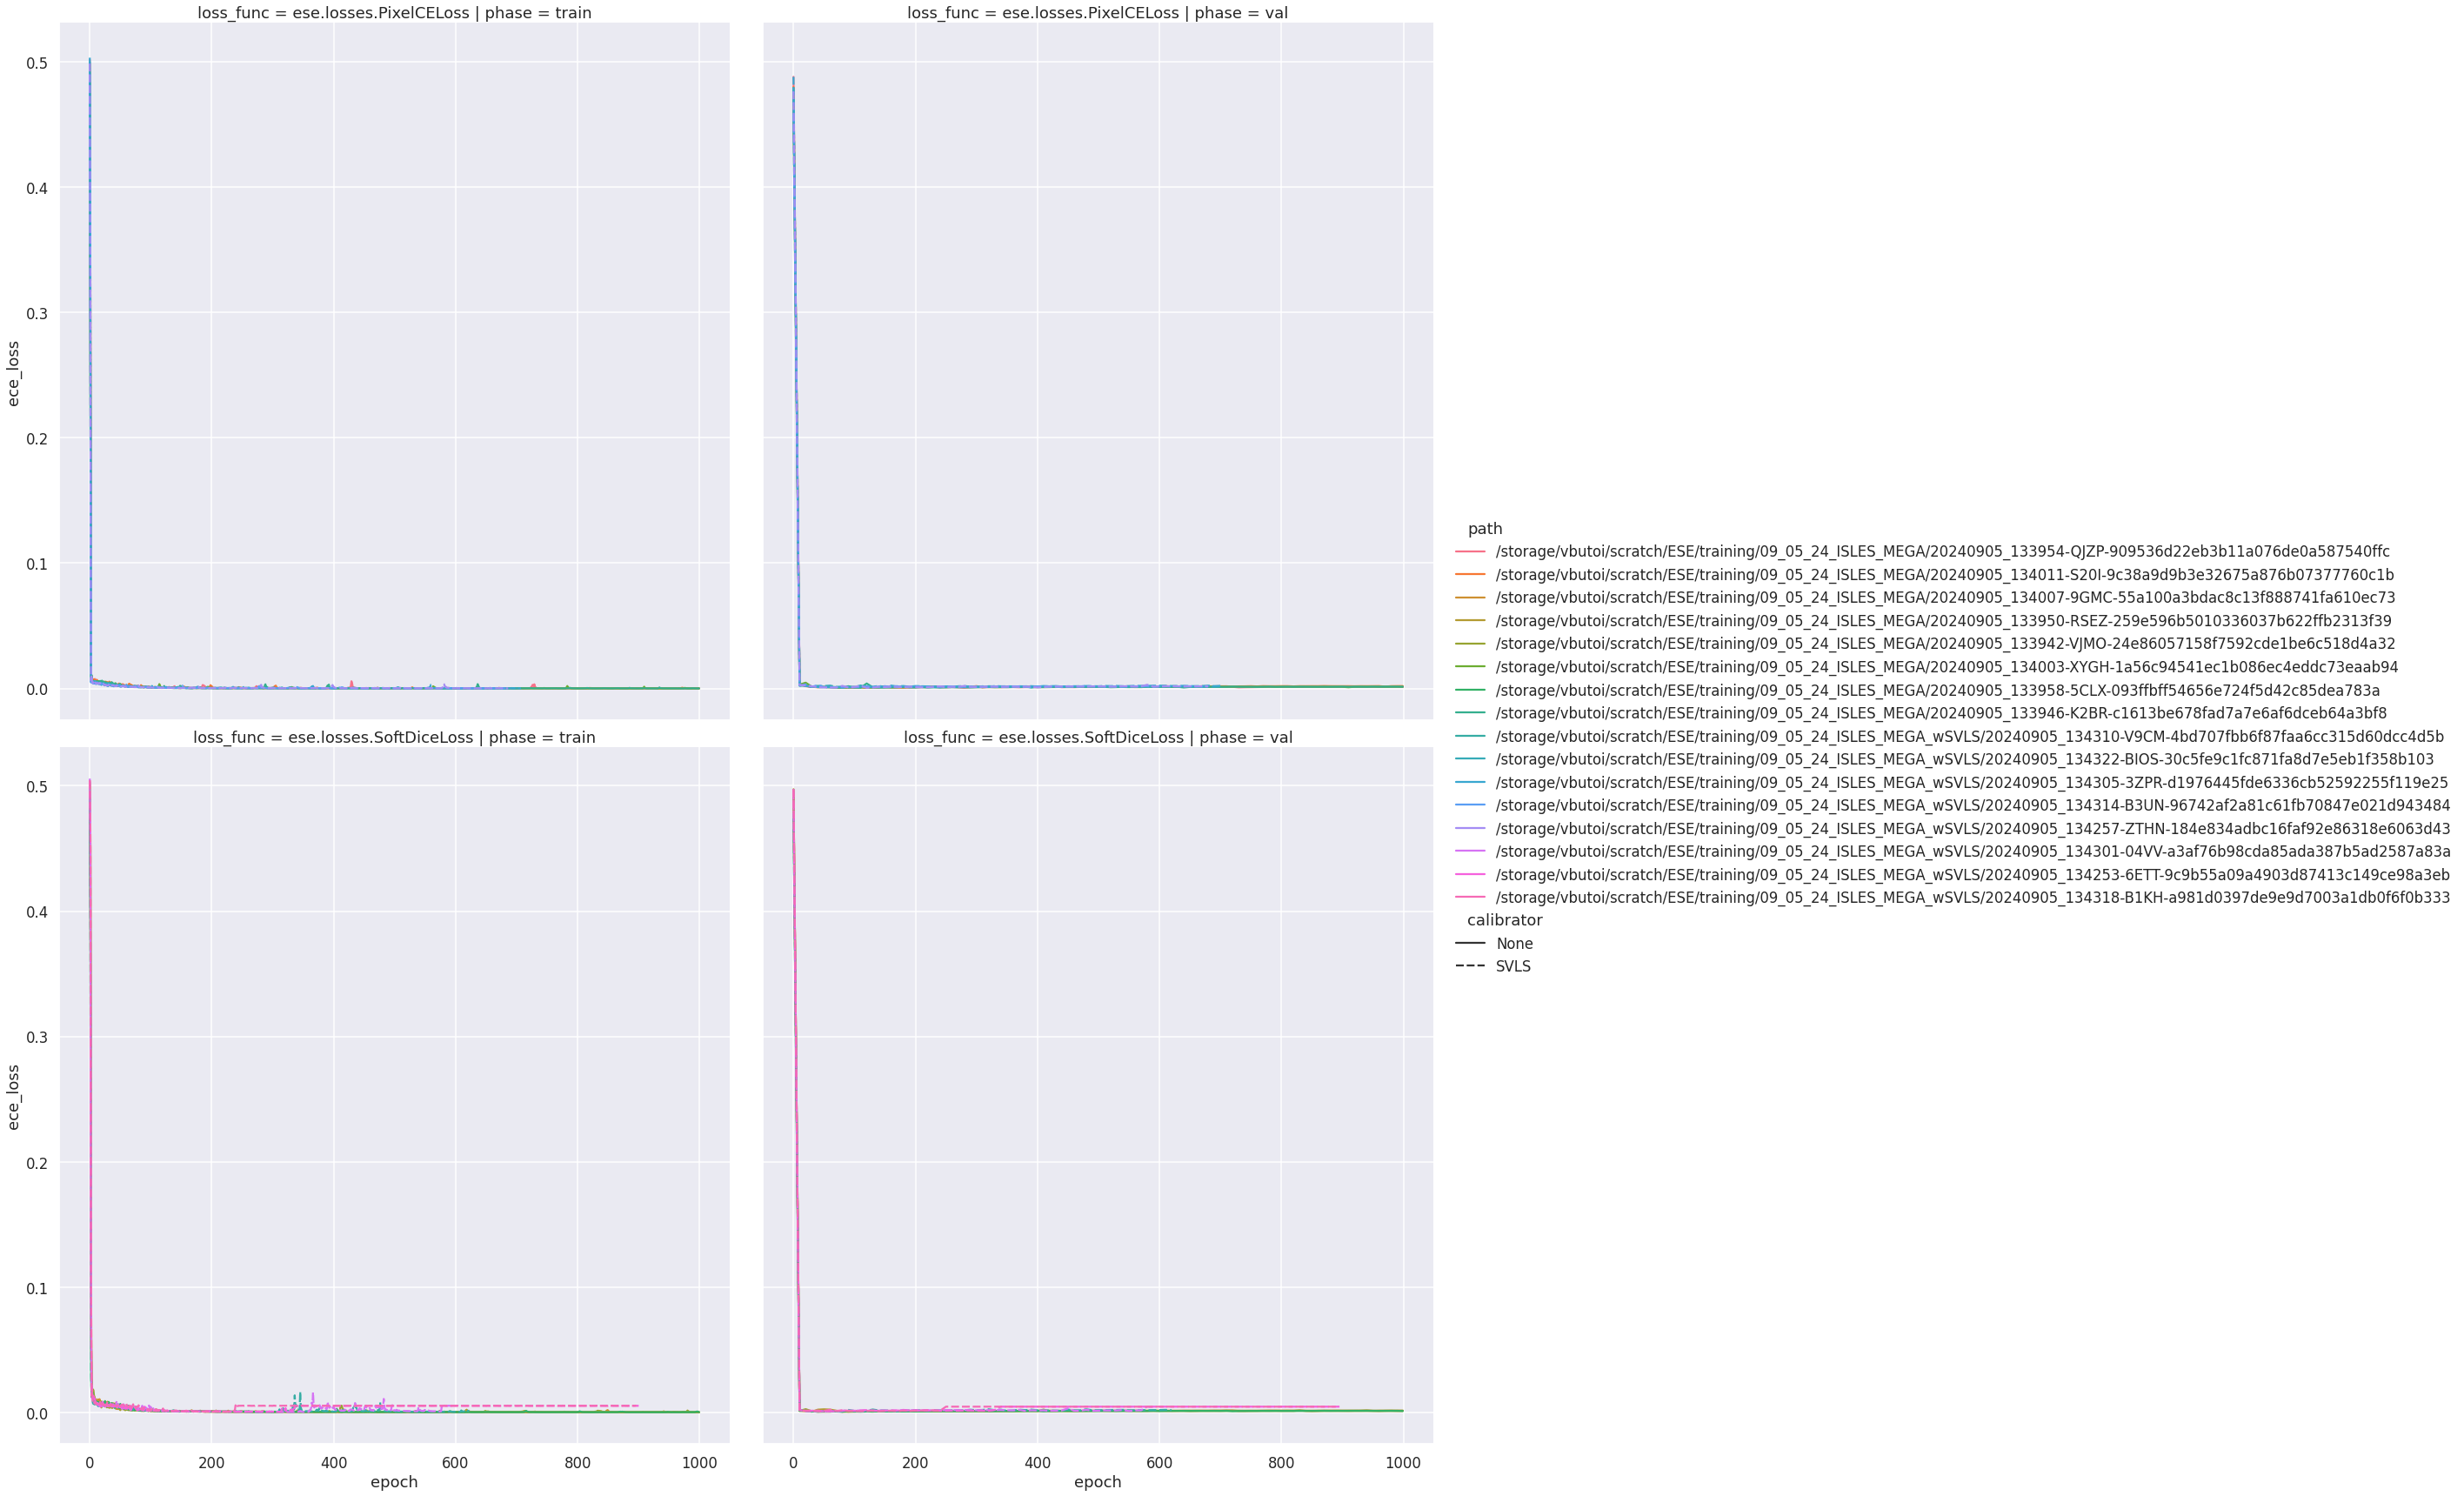

In [9]:
g = sns.relplot(
    data=df,
    x='epoch',
    y='ece_loss',
    hue='path',
    style='calibrator',
    row='loss_func',   
    col='phase',
    kind='line',
    height=12,
    # palette=custom_palette
)

# Set column spacing
g.fig.subplots_adjust(wspace=0.05)
# g.set(ylim=(0.0, 0.25))

In [10]:
# g = sns.relplot(
#     data=df,
#     x='epoch',
#     y='area_estimation_error',
#     hue='path',
#     style='calibrator',
#     row='loss_func',   
#     col='phase',
#     kind='line',
#     height=12,
#     # palette=custom_palette
# )

# # Set column spacing
# g.fig.subplots_adjust(wspace=0.05)
# # g.set(ylim=(0.0, 0.25))